In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from scipy.stats import ttest_ind

In [5]:
# Step 1: Load data and basic inspection
# Load the CSV file from MySQL export
file_path = 'L:/sql/Uploads/cleaned_sleep_data.csv'
df = pd.read_csv(file_path)

In [7]:
# Display basic information about the dataset
print("First 5 rows of data:")
print(df.head())
print("\nData info:")
print(df.info())
print("\nStatistical summary:")
print(df.describe())

First 5 rows of data:
   1  Male  27     Software Engineer  6.1  6  42  6.2 Overweight  126/83  77  \
0  2  Male  28                Doctor  6.2  6  60    8     Normal  125/80  75   
1  3  Male  28                Doctor  6.2  6  60    8     Normal  125/80  75   
2  4  Male  28  Sales Representative  5.9  4  30    8      Obese  140/90  85   
3  5  Male  28  Sales Representative  5.9  4  30    8      Obese  140/90  85   
4  6  Male  28     Software Engineer  5.9  4  30    8      Obese  140/90  85   

    4200         None  
0  10000          NaN  
1  10000          NaN  
2   3000  Sleep Apnea  
3   3000  Sleep Apnea  
4   3000     Insomnia  

Data info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 373 entries, 0 to 372
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   1                  373 non-null    int64  
 1   Male               373 non-null    object 
 2   27                 373 non-null    int6

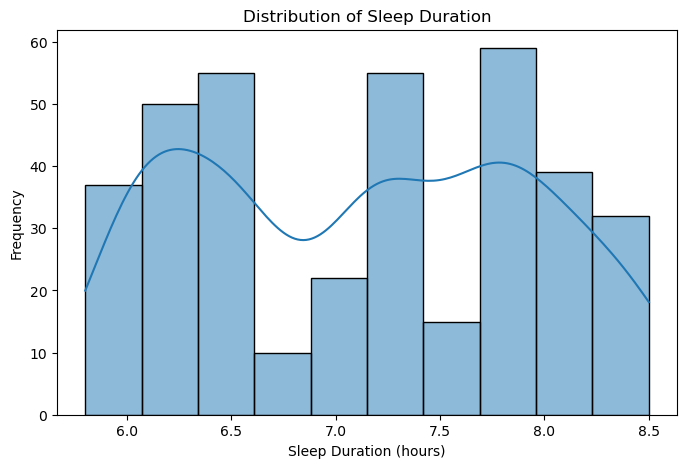

In [15]:
# Step 2: Basic statistics and visualization
# 2.1 Distribution of Sleep Duration
plt.figure(figsize=(8, 5))
sns.histplot(df['sleep_duration'], bins=10, kde=True)
plt.title('Distribution of Sleep Duration')
plt.xlabel('Sleep Duration (hours)')
plt.ylabel('Frequency')
plt.show()

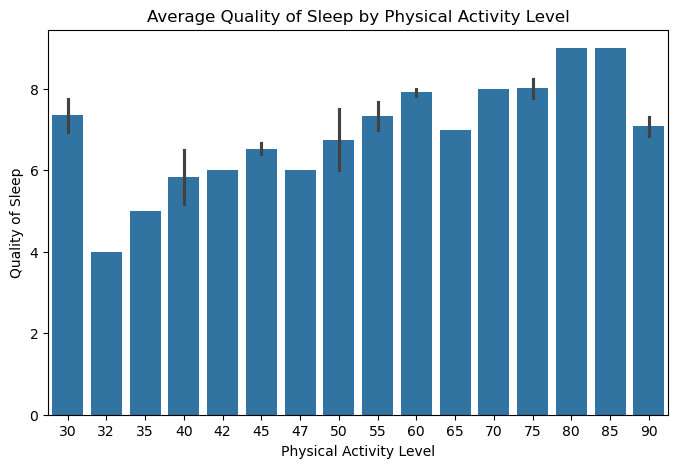

In [17]:
# 2.2 Relationship between Sleep Quality and Physical Activity Level
plt.figure(figsize=(8, 5))
sns.barplot(x='physical_activity_level', y='quality_of_sleep', data=df)
plt.title('Average Quality of Sleep by Physical Activity Level')
plt.xlabel('Physical Activity Level')
plt.ylabel('Quality of Sleep')
plt.show()

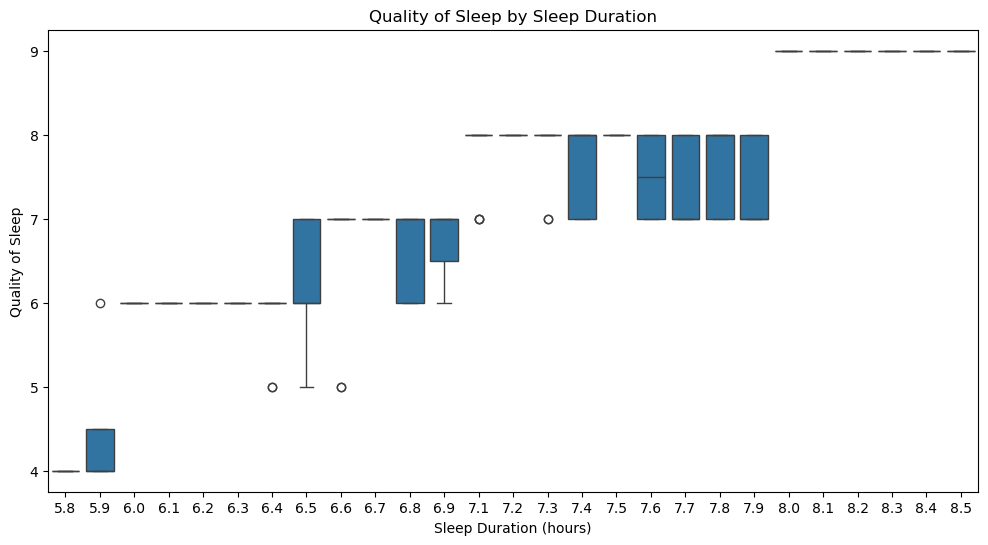

In [23]:
# Step 3: Explore key factors affecting sleep quality
# 3.1 Relationship between Sleep Duration and Sleep Quality
plt.figure(figsize=(12, 6))
sns.boxplot(x='sleep_duration', y='quality_of_sleep', data=df)
plt.title('Quality of Sleep by Sleep Duration')
plt.xlabel('Sleep Duration (hours)')
plt.ylabel('Quality of Sleep')
plt.show()

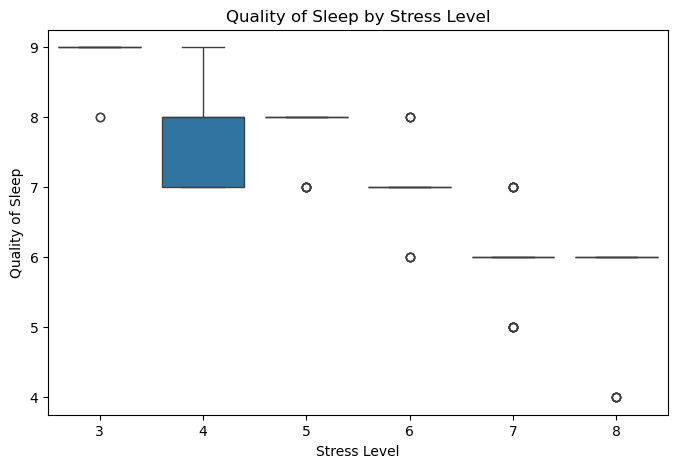

In [27]:
# 3.2 Relationship between Stress Level and Sleep Quality
plt.figure(figsize=(8, 5))
sns.boxplot(x='stress_level', y='quality_of_sleep', data=df)
plt.title('Quality of Sleep by Stress Level')
plt.xlabel('Stress Level')
plt.ylabel('Quality of Sleep')
plt.show()

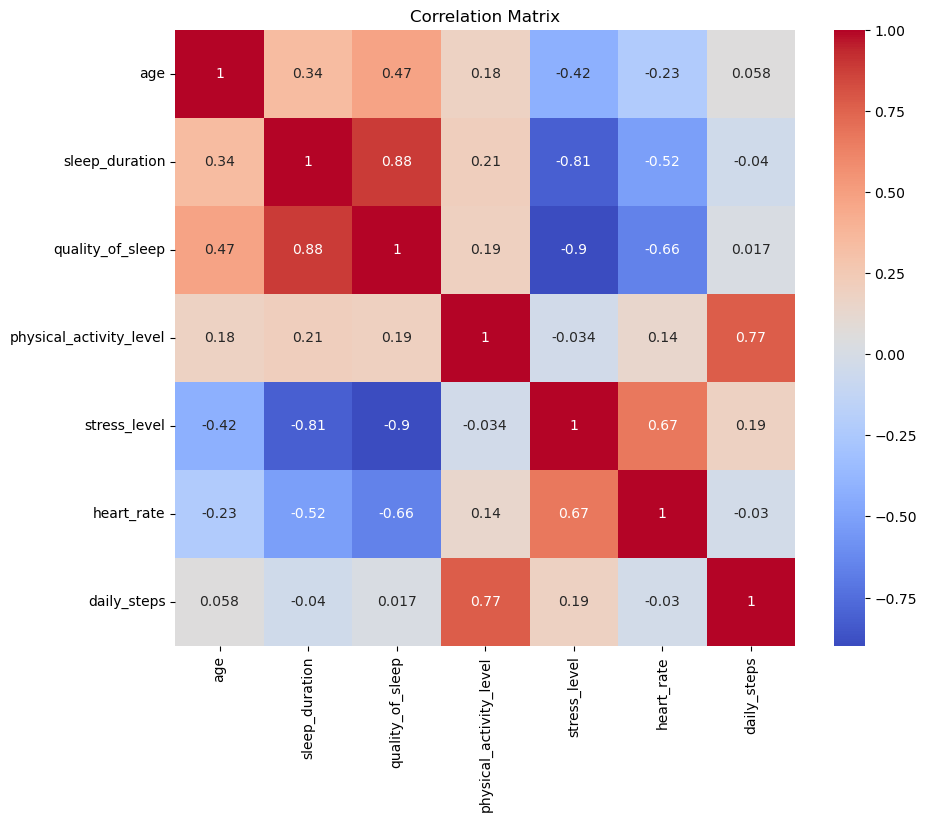

In [33]:
# Step 4: Correlation analysis and hypothesis testing
# Select only numerical columns for correlation calculation, excluding 'person_id'
numeric_df = df.select_dtypes(include='number').drop(columns=['person_id'])

# Plot the correlation matrix heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()



In [35]:
# 4.2 Hypothesis testing - Does activity level significantly affect sleep quality?
# Split data into high and low physical activity levels
high_activity = df[df['physical_activity_level'] > df['physical_activity_level'].median()]['quality_of_sleep']
low_activity = df[df['physical_activity_level'] <= df['physical_activity_level'].median()]['quality_of_sleep']

# Perform a T-test to compare sleep quality between high and low activity levels
t_stat, p_val = ttest_ind(high_activity, low_activity)
print(f"T-test p-value for high vs. low activity on sleep quality: {p_val}")

T-test p-value for high vs. low activity on sleep quality: 0.00044402981304809063


In [39]:
# Step 5: Decision Tree Modeling
# 5.1 Split data and train a Decision Tree model to predict sleep quality
# Select key features for prediction
X = df[['sleep_duration', 'physical_activity_level', 'stress_level', 'daily_steps']]
y = df['quality_of_sleep']

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Decision Tree Regressor
tree_model = DecisionTreeRegressor(random_state=42)
tree_model.fit(X_train, y_train)

# Make predictions and evaluate model performance
y_pred = tree_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (Decision Tree): {mse}")

Mean Squared Error (Decision Tree): 0.0026666666666666713


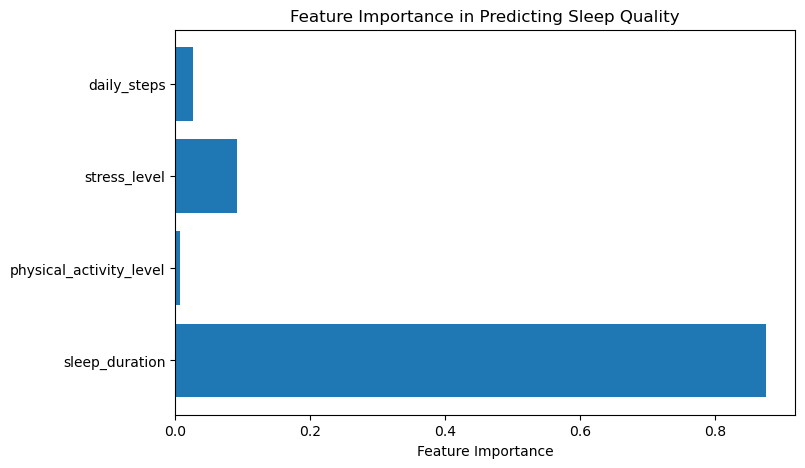

In [41]:
# 5.2 Visualize feature importance
# Display the importance of each feature in predicting sleep quality
feature_importances = tree_model.feature_importances_
plt.figure(figsize=(8, 5))
plt.barh(X.columns, feature_importances)
plt.xlabel('Feature Importance')
plt.title('Feature Importance in Predicting Sleep Quality')
plt.show()

In [43]:
# Step 6: Hyperparameter tuning (optional)
# Use GridSearchCV to find the best parameters for the Decision Tree model
param_grid = {
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [2, 5, 10]
}

# Initialize GridSearchCV with the defined parameter grid
grid_search = GridSearchCV(DecisionTreeRegressor(random_state=42), param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Output the best parameters and MSE score from the grid search
best_params = grid_search.best_params_
print("Best Parameters from Grid Search:", best_params)
print("Best MSE from Grid Search:", -grid_search.best_score_)

Best Parameters from Grid Search: {'max_depth': 7, 'min_samples_split': 10}
Best MSE from Grid Search: 0.06270618037495392
